# Data-based time series prediction

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

## Data
### Real data Germany

In [2]:
rki_covid_data = pd.read_csv("../Week 5/RKI_COVID19.csv", header=0, sep=",")
rki_covid_data.head()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,8389847,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/14 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
1,8389848,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2,8389849,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
3,8389850,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/21 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
4,8389851,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/27 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/22 00:00:00,0,1,1,Nicht übermittelt


In [4]:
print(rki_covid_data["AnzahlTodesfall"].unique())
print(rki_covid_data["AnzahlFall"].unique())
print(rki_covid_data["NeuerFall"].unique())

[ 0  1  3  2  6  4  5  7  8 -1]
[ 1  2  3  4  7 11  6 13  9  5 19  8 10 15 12 -1 18 14 16 17 29 22 23 32
 20 34 62 38 26 27 21 31 24 33 25 28]
[ 0  1 -1]


In [5]:
 # create a column containing the date
rki_covid_data["Date"] = pd.to_datetime(rki_covid_data['Refdatum'], format='%Y/%m/%d %H:%M:%S.%f')
rki_covid_data["Date"] = rki_covid_data['Date'].dt.date
rki_covid_data.head()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2,Date
0,8389847,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/14 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt,2020-03-16
1,8389848,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt,2020-03-13
2,8389849,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt,2020-03-16
3,8389850,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/21 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt,2020-03-13
4,8389851,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/27 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/22 00:00:00,0,1,1,Nicht übermittelt,2020-03-22


In [24]:
# filter the dataframe for deaths per day by multiplying entries by the number of deaths they count
# cases_per_day_pre = rki_covid_data[rki_covid_data['NeuerFall'].isin([0,1])].groupby("Date")['AnzahlFall'].value_counts()
# cases_per_day = pd.DataFrame(index=cases_per_day_pre.index.get_level_values('Date'))
# cases_per_day["Cases"] = 0
# for date in cases_per_day.index:
#     for level in cases_per_day_pre.loc[date].index.get_level_values(0):
#         cases_per_day.at[date, "Cases"] = cases_per_day.at[date, "Cases"] + level * cases_per_day_pre.loc[date, level]
cases_per_day = rki_covid_data[rki_covid_data['NeuerFall'].isin([0,1])].groupby("Date", as_index=True).AnzahlFall.sum()
cases_per_day

Date
2020-01-01       1
2020-01-02       1
2020-01-06       1
2020-01-17       2
2020-01-20       1
2020-01-21       1
2020-01-23       4
2020-01-24       1
2020-01-25       1
2020-01-27       2
2020-01-28       2
2020-01-29       1
2020-01-30       7
2020-01-31      16
2020-02-01       1
2020-02-02       5
2020-02-03       4
2020-02-04       3
2020-02-05       1
2020-02-06       1
2020-02-07       2
2020-02-09       2
2020-02-10       6
2020-02-11       5
2020-02-12       6
2020-02-13       6
2020-02-14       7
2020-02-15      12
2020-02-16       7
2020-02-17       9
              ... 
2020-04-22    1757
2020-04-23    1627
2020-04-24    1466
2020-04-25    1162
2020-04-26     766
2020-04-27    1185
2020-04-28    1089
2020-04-29    1090
2020-04-30    1157
2020-05-01     838
2020-05-02     665
2020-05-03     577
2020-05-04     819
2020-05-05     908
2020-05-06     913
2020-05-07     861
2020-05-08     814
2020-05-09     593
2020-05-10     403
2020-05-11     624
2020-05-12     622
2020-05

In [25]:
cases_per_day.sum()

177212

In [28]:
 # drop all dates before 2020/3/1 and after 2020/04/20
data = cases_per_day[datetime.date(2020,3,1):datetime.date(2020,4,30)]
data_train = cases_per_day[datetime.date(2020,3,1):datetime.date(2020,4,20)]
data_test = cases_per_day[datetime.date(2020,4,21):datetime.date(2020,4,30)]
data.shape, data_train.shape, data_test.shape

((61,), (51,), (10,))

In [30]:
data_unique = data.drop_duplicates()
data_train_unique = data_train.drop_duplicates()
data_test_unique = data_test.drop_duplicates()
print(data_unique.shape, data_train_unique.shape, data_test_unique.shape)

(61,) (51,) (10,)


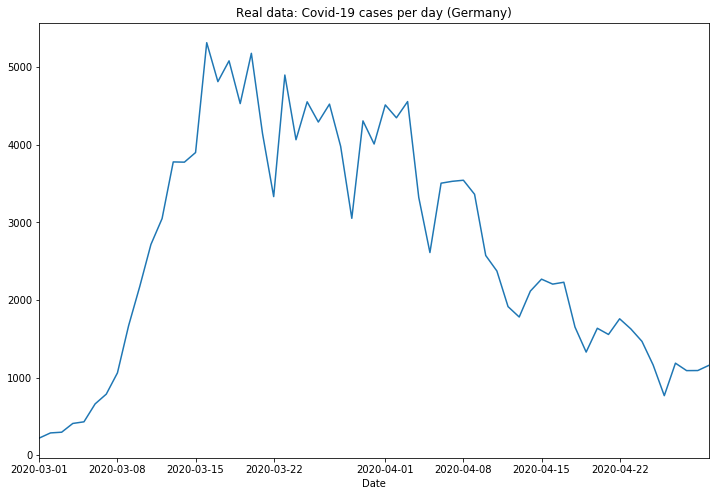

In [31]:
data_unique.plot(figsize=(12, 8), title="Real data: Covid-19 cases per day (Germany)")
plt.show()

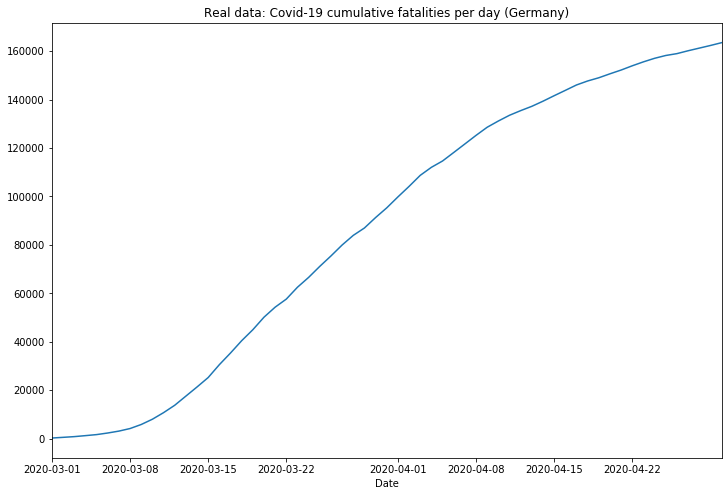

In [32]:
data_unique.cumsum().plot(figsize=(12, 8), title="Real data: Covid-19 cumulative fatalities per day (Germany)")
plt.show()

### SEICRD generated data
See assignment week 5:
- SEICRD model was fit to rki real case data (GER) (based on reported cases, from 2020/3/1 until 2020/05/21)
- generated data from scenario without any measures over range of 200 (from 2020/01/31 to 2020/11/5 including outbreak shift)
- took only numbers from 'Infectious' compartment


In [49]:
SIR_data = pd.read_csv('SIR_generated_data.csv')

In [50]:
SIR_data["Date"] = pd.to_datetime(SIR_data['Date'], format='%Y/%m/%d %H:%M:%S.%f')
SIR_data["Date"] = SIR_data['Date'].dt.date

In [51]:
SIR_data.Cases = SIR_data.Cases.round(0).astype('int')
SIR_data = SIR_data.set_index('Date')

In [52]:
SIR_data.index.min(), SIR_data.index.max()

(datetime.date(2020, 1, 31), datetime.date(2020, 11, 5))

In [53]:
SIR_data_train = SIR_data[datetime.date(2020, 3, 1):datetime.date(2020, 4, 20)]
SIR_data_test = SIR_data[datetime.date(2020, 4, 21):datetime.date(2020, 4, 30)]

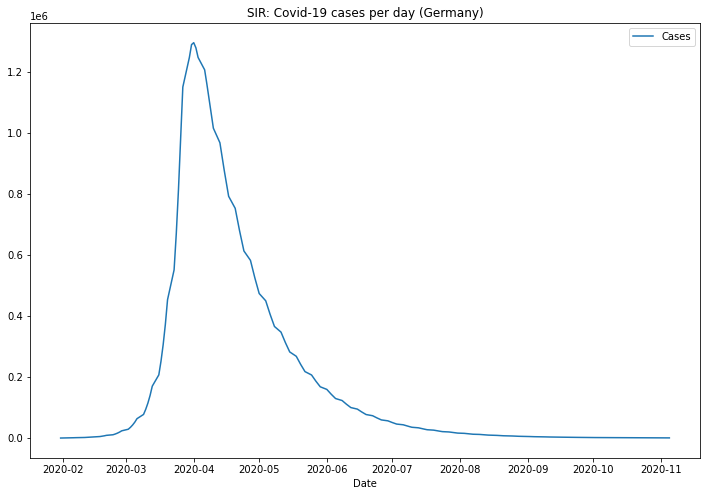

In [54]:
SIR_data.plot(figsize=(12, 8), title="SIR: Covid-19 cases per day (Germany)")
plt.show()

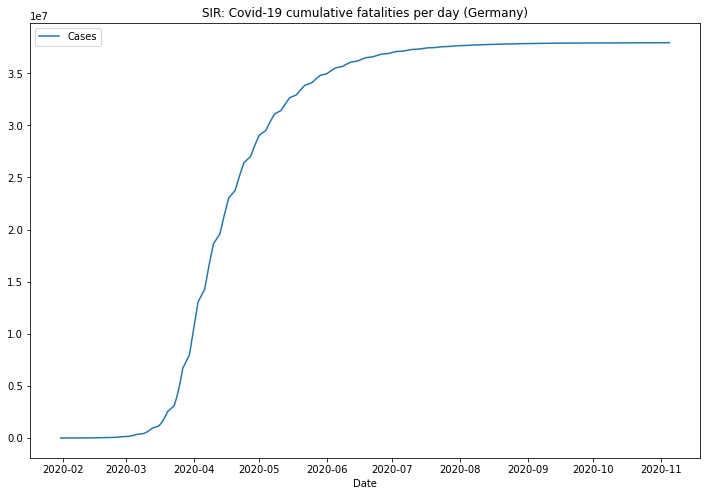

In [55]:
SIR_data.cumsum().plot(figsize=(12, 8), title="SIR: Covid-19 cumulative fatalities per day (Germany)")
plt.show()

In [58]:
SIR_data_train.shape

(36, 1)

### ABS-generated data
See assignment week 6:
- Corona abs without measures and the following parameters:
    - initial_infected_perc = 0.02,
    - initial_immune_perc = 0.01,
    - population_size=1000,
    - condition_perc=0.05,
    - contagion_distance=5., 
    - contagion_rate=0.5,               
    - critical_limit=0.10,
    - amplitudes = {Status.Susceptible : 5, Status.Recovered_Immune : 5, Status.Infected : 5 },
    - store_infection_rate = 0.6, 
    - stores_per_thousand = 4,
    - days_without_shopping = 4 
    - simulation duration = 100 days

In [59]:
ABS_data = pd.read_csv('../Week 6/scenarios/do_nothing_reduced.csv')

In [60]:
ABS_data.columns

Index(['Iteration', 'Metric', 'Min', 'Avg', 'Std', 'Max'], dtype='object')

In [61]:
ABS_infected = ABS_data[ABS_data.Metric=="Infected"]
ABS_infected['case_count'] = ABS_infected.Avg*1000
ABS_infected.case_count = ABS_infected.case_count.astype(int)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


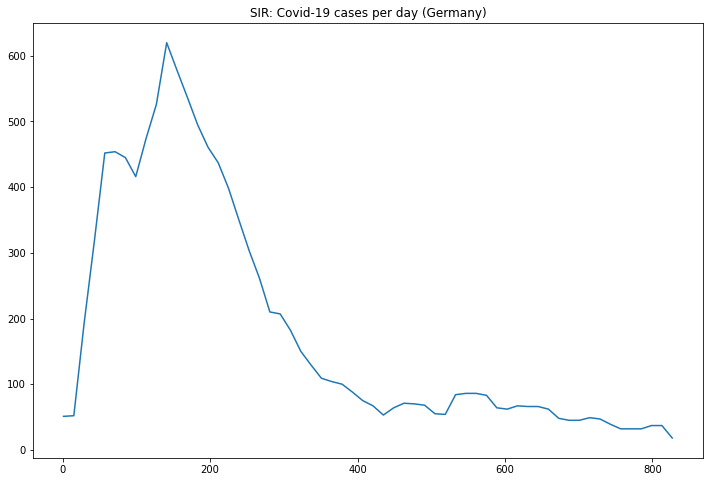

In [67]:
ABS_infected['case_count'].plot(figsize=(12, 8), title="ABS: Covid-19 cases per day")
plt.show()

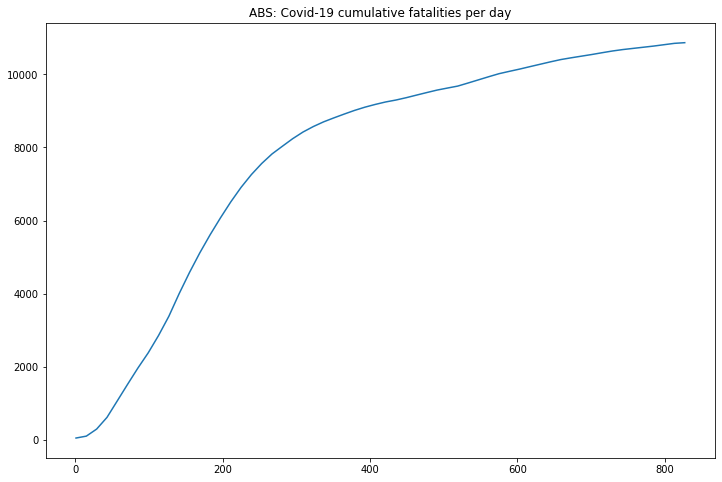

In [68]:
ABS_infected['case_count'].cumsum().plot(figsize=(12, 8), title="ABS: Covid-19 cumulative fatalities per day")
plt.show()

In [75]:
ABS_infected_train = ABS_infected[ABS_infected.Iteration<=51]
ABS_infected_test = ABS_infected[ABS_infected.Iteration>51]

In [76]:
ABS_infected_train.shape

(52, 7)

## "Classical" time-series prediction approach
Does not look good, do we have to remove trends and seasonality first?

In [108]:
# ARIMA example
!pip3.7 install statsmodels
from statsmodels.tsa.arima_model import ARIMA

In [111]:
# fit model
model = ARIMA(data_train_unique, order=(1, 1, 1))
model_fit = model.fit(disp=False)

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [112]:
model_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 1113.4708 
Dependent Variable: D.Cases          Log-Likelihood:      -548.91   
Date:               2020-06-03 16:39 Scale:               1.0000    
No. Observations:   50               Method:              css-mle   
Df Model:           3                Sample:              03-02-2020
Df Residuals:       47                                    04-20-2020
Converged:          1.0000           S.D. of innovations: 14164.105 
No. Iterations:     55.0000          HQIC:                1108.735  
AIC:                1105.8227                                       
--------------------------------------------------------------------
               Coef.    Std.Err.    t    P>|t|    [0.025     0.975] 
--------------------------------------------------------------------
const         366.7225 1293.2736  0.2836 0.7767 -2168.0473 2901.4922
ar.L1.D.Cases   0.5038    0.2715  1.8554 0.0635    -0.0284    1.0360
ma.L1.D.Cases  -0.6875    0.2136 -3.2185 0.0013    -1.1061   -0.2688
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.9850             0.0000           1.9850             0.0000
MA.1            1.4546             0.0000           1.4546             0.0000
====================================================================

"""

In [113]:
# make prediction
yhat = model_fit.predict(len(data_train_unique), len(data_train_unique), typ='levels')
print(yhat)

2020-04-21    19289.17533
Freq: D, dtype: float64


In [114]:
len(data_train_unique)

51

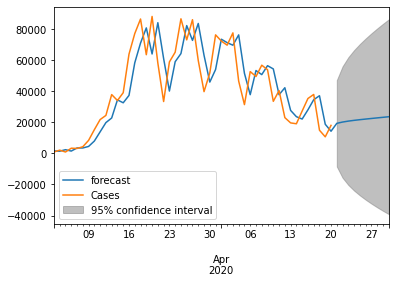

In [123]:
model_fit.plot_predict(datetime.date(2020,3,3), datetime.date(2020,4,30))
#plt.ylim((-2000,2000))
plt.show()

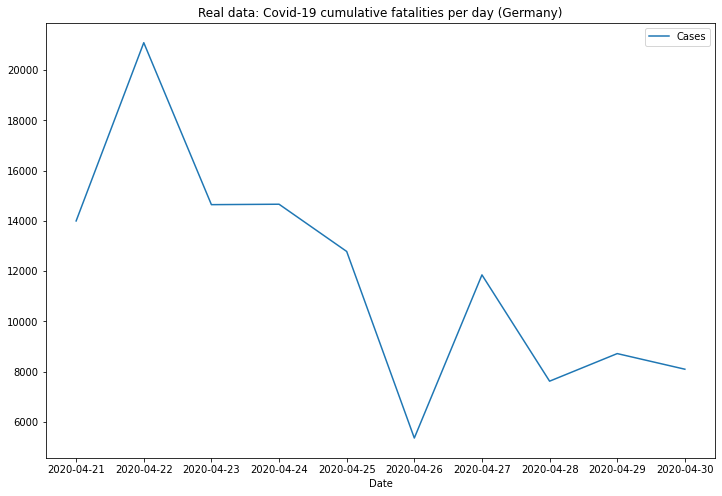

In [125]:
data_test_unique.plot(figsize=(12, 8), title="Real data: Covid-19 cumulative fatalities per day (Germany)")
plt.show()

In [135]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# fit model
model = ExponentialSmoothing(data_train_unique)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(datetime.date(2020,4,21), datetime.date(2020,4,30))
print(yhat)

2020-04-21    17072.351852
2020-04-22    17072.351852
2020-04-23    17072.351852
2020-04-24    17072.351852
2020-04-25    17072.351852
2020-04-26    17072.351852
2020-04-27    17072.351852
2020-04-28    17072.351852
2020-04-29    17072.351852
2020-04-30    17072.351852
Freq: D, dtype: float64


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


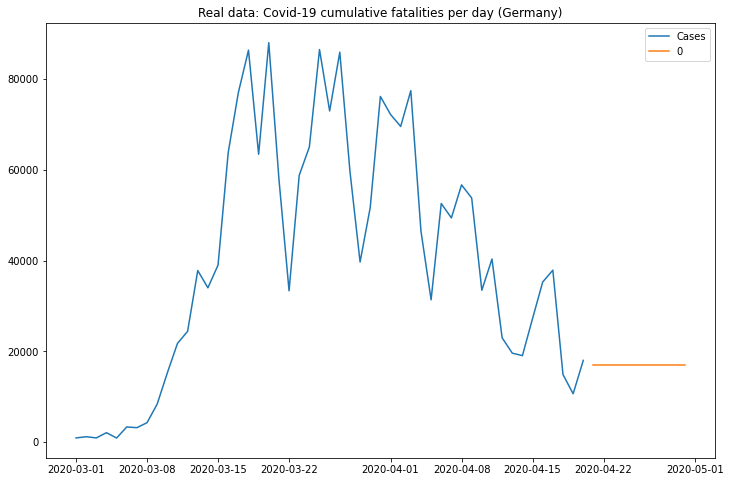

In [136]:
pd.concat([data_train_unique, yhat]).plot(figsize=(12, 8), title="Real data: Covid-19 cumulative fatalities per day (Germany)")
plt.show()

## Prophet library

In [142]:
!pip3.7 install convertdate
!pip3.7 install fbprophet

  Using cached convertdate-2.2.1-py2.py3-none-any.whl (43 kB)
Processing /Users/Eva/Library/Caches/pip/wheels/80/32/5f/2a67880d4ce584b9cf99146f9945e46942dfb010a9382c6ff5/PyMeeus-0.3.7-py3-none-any.whl
  Using cached fbprophet-0.6.tar.gz (54 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
Processing /Users/Eva/Library/Caches/pip/wheels/90/4e/82/f4130a57eb035c4344489ca14caff692590719b5f375540f53/holidays-0.10.2-py3-none-any.whl
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached ephem-3.7.7.1-cp37-cp37m-macosx_10_6_intel.whl (1.5 MB)
  Using cached korean_lunar_calendar-0.2.1-py3-none-any.whl (8.0 kB)
  ERROR: Command errored out with exit status 1:
   command: /usr/local/opt/python/bin/python3.7 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/mw/2nc93cjn59b6dmmmd4d8ccmm0000gn/T/pip-install-ca8jhzpy/fbprophet/setup.py'"'"'; __file__='"'"'/private/var/folders/mw/2nc93cjn59b6dmmmd4d8ccmm0000gn/T/pip-install-ca8j

In [141]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
# rename columns do DS and Y